<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/Week%203/Assignment/CIFAR-10%20Dataset/CIFAR_10_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

## Data Preparation

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).cache().prefetch(tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models, regularizers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),

    # Augmentasi data (opsional tapi sangat disarankan)
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

    # Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    # Block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # Fully Connected
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Flatten Layer
Meratakan input dari shape (32, 32, 3) menjadi vektor 1D (3072,):
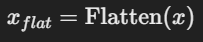

Dense Layer
Perhitungan tiap neuron:

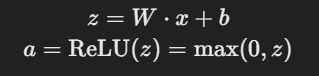

Dropout Layer digunakan untuk mencegah overfitting:

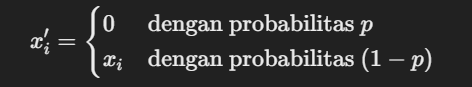

Output Layer (Softmax)
Mengubah skor menjadi probabilitas:

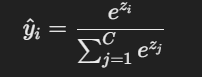

## CNN Model

Fungsi Loss - Sparse Categorical Crossentropy
Untuk label dalam format integer:

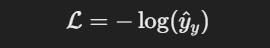

Optimizer - Adam
Gabungan antara momentum dan RMSProp:

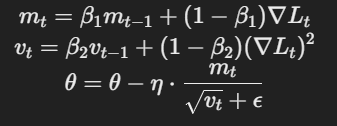

In [ ]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callback biar gak overfit
early_stop = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

# Train
cnn_history = cnn_model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    callbacks=[early_stop]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.3019 - loss: 2.1835 - val_accuracy: 0.2460 - val_loss: 2.3403
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4878 - loss: 1.4498 - val_accuracy: 0.5748 - val_loss: 1.1919
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5620 - loss: 1.2311 - val_accuracy: 0.5928 - val_loss: 1.2031
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6073 - loss: 1.1184 - val_accuracy: 0.5747 - val_loss: 1.2206
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6293 - loss: 1.0495 - val_accuracy: 0.6082 - val_loss: 1.1575
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6571 - loss: 0.9799 - val_accuracy: 0.6268 - val_loss: 1.1021
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6777 - loss: 0.9344 - val_accuracy: 0.7053 - val_loss: 0.8455
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6931 - loss: 0.8876 - 

In [ ]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    "cifar10",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)

In [ ]:
# Normalize: [0,255] → [0,1]
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_test = ds_test.map(preprocess).batch(32)

In [ ]:
test_images = []
test_labels = []

for image_batch, label_batch in tfds.as_numpy(ds_test):
    test_images.append(image_batch)
    test_labels.append(label_batch)

# Gabungkan seluruh batch
test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

In [ ]:
pred_probs = cnn_model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)

accuracy = accuracy_score(test_labels, pred_classes)
precision = precision_score(test_labels, pred_classes, average='macro')
recall = recall_score(test_labels, pred_classes, average='macro')
f1 = f1_score(test_labels, pred_classes, average='macro')

y_true_bin = tf.keras.utils.to_categorical(test_labels, 10)
auc = roc_auc_score(y_true_bin, pred_probs, average='macro', multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8048
Precision: 0.8111666857646004
Recall: 0.8048
F1 Score: 0.7998123974981517
AUC Score: 0.9810902777777779


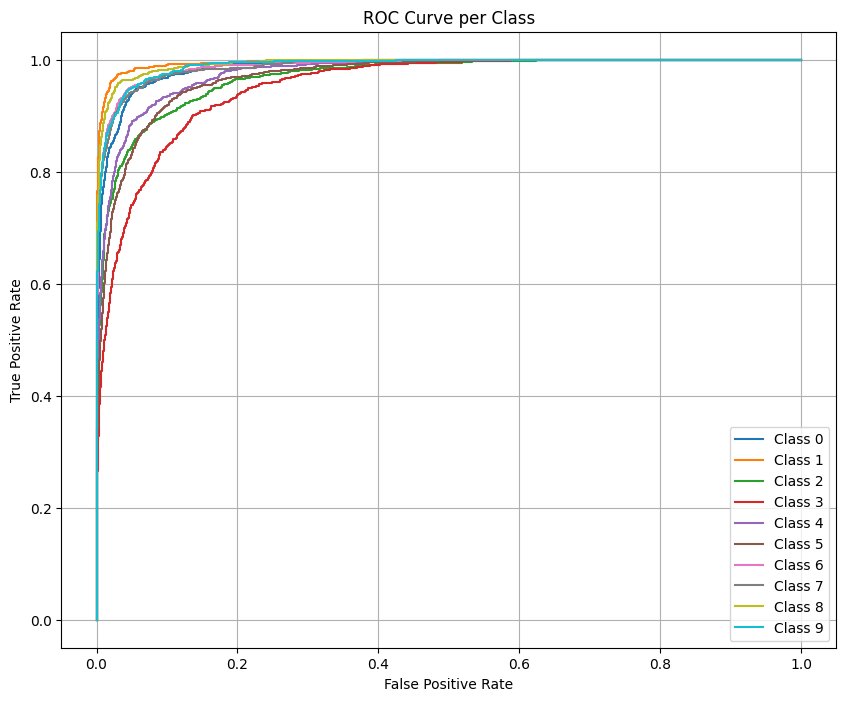

In [ ]:
fpr = dict()
tpr = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], pred_probs[:, i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend()
plt.grid(True)
plt.show()


## MLP Model

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load CIFAR-10
(ds_train, ds_test), ds_info = tfds.load('cifar10',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

# Fungsi preprocessing
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalisasi ke [0, 1]
    return image, label

# Apply preprocessing dan batching
batch_size = 128

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(ds_train,
                            validation_data=ds_test,
                            epochs=30)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.2761 - loss: 2.0435 - val_accuracy: 0.3940 - val_loss: 1.7106
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3920 - loss: 1.7068 - val_accuracy: 0.4278 - val_loss: 1.6212
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4258 - loss: 1.6181 - val_accuracy: 0.4296 - val_loss: 1.5770
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4476 - loss: 1.5459 - val_accuracy: 0.4601 - val_loss: 1.5119
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4679 - loss: 1.4945 - val_accuracy: 0.4740 - val_loss: 1.4826
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4814 - loss: 1.4600 - val_accuracy: 0.4817 - val_loss: 1.4597
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4956 - loss: 1.4227 - val_accuracy: 0.4806 - val_loss: 1.4659
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5067 - loss: 1.3955 - val_accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Ambil semua prediksi dari test set
y_true = []
y_probs = []

for images, labels in ds_test:
    preds = mlp_model.predict(images, verbose=0)
    y_probs.extend(preds)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_probs = np.array(y_probs)
y_pred = np.argmax(y_probs, axis=1)

# Evaluasi
print("Akurasi  :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall   :", recall_score(y_true, y_pred, average='macro'))
print("F1 Score :", f1_score(y_true, y_pred, average='macro'))
print("AUC      :", roc_auc_score(y_true, y_probs, multi_class='ovr'))


Akurasi  : 0.5119
Precision: 0.5217103516287354
Recall   : 0.5119
F1 Score : 0.5096748539905678
AUC      : 0.8879836666666666


## Evaluasi Model

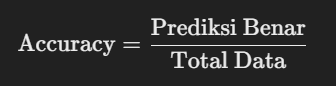

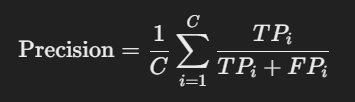

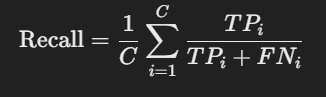

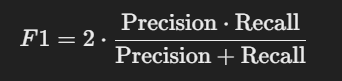